In [35]:
pwd # The working directory is the same has the one where the workbook is lockated.

'/Users/annick/OneDrive/Documents/2_Data_analysis_research/1. Data_Analysis_and_Interpretation/0. Python_Working_Directory'

# 1. Loading the required Python packages for the data analysis

We will start by importing the required packages for data analysis in Python.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

1. **NumPy**: Provides a fast numerical array structure and helper functions.
2. **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
3. **scikit-learn**: The essential Machine Learning package in Python.
4. **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
5. **Seaborn**: Advanced statistical plotting library.
6. **statsmodels.formula.api** : provides classes and functions for the estimation of many different statistical models.
7. **scipy.stats** : contains a large number of probability distributions as well as a growing library of statistical functions.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns           # The seaborn package is for plots
import matplotlib.pyplot as plt # Basic package for the plots
import statsmodels.formula.api as smf # statsmodels for statistics
import statsmodels.stats.multicomp as multi # statsmodels and posthoc test 
                                            # calculate all pairwise comparisons with TukeyHSD confidence intervals 
import scipy.stats              # For the Chi-Square test of independance and other statistical packages

In [37]:
# Importing the dataset that we will be working with
dataset = pd.read_csv("titanic_dataset.csv", low_memory = False)

In [38]:
# Very basic informations about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [39]:
# Let's look at the type of the variables in the dataset
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [40]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Some of the variables are actualy categorical, we will convert them to the correct data type, before doing any further analysis.

In [41]:
# Because Python is treating the variables has string instead of numeric variables
# we will convert them as numeric with the following function

#dataset["Survived"] = pd.to_numeric(dataset["Survived"])
dataset["Age"] = pd.to_numeric(dataset["Age"])
dataset["Fare"] = pd.to_numeric(dataset["Fare"])


# We will convert these variables into categorical variables
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset["Sex"] = dataset["Sex"].astype("category")
dataset["Survived"] = dataset["Survived"].astype("category")

# 1. Univariate graphs

## Violin plots

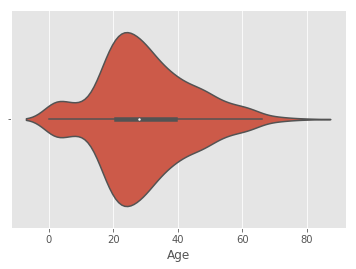

In [42]:
# Create violin plot
sns.violinplot(x = "Age", data=dataset)

# Show the plot
plt.show()

## Swarmplot Plot

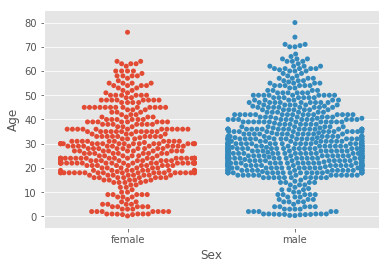

In [43]:
# Construct iris plot
sns.swarmplot(x="Sex", y="Age", data = dataset)

# Show plot
plt.show()

# Bar plot

**Note** that in the code chunk above you work with a built-in Seaborn data set and you create a factorplot with it. A factorplot is a categorical plot, which in this case is a bar plot. That’s because you have set the kind argument to "bar". Also, you set which colors should be displayed with the palette argument and that you set the legend to False.

# Seaborn code for a univariate bar plot

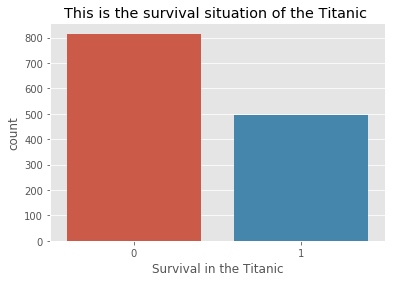

In [44]:
# univariate bar plot 
sns.countplot(x="Survived", data=dataset)
plt.xlabel("Survival in the Titanic")
plt.title("This is the survival situation of the Titanic ")
plt.show()

# Seaborn code for a histogram

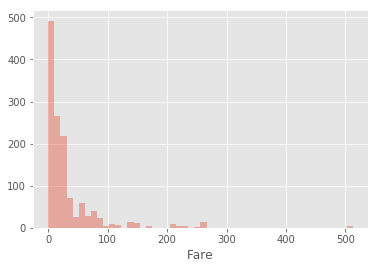

In [45]:
sns.distplot(dataset["Fare"].dropna(), kde=False)
plt.show()

# Bivariate bar graph

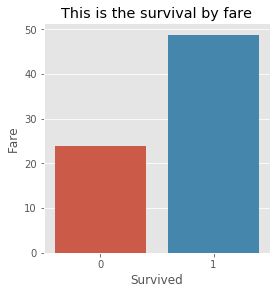

In [46]:
sns.factorplot("Survived","Fare", data=dataset, kind="bar", ci=None)
plt.title("This is the survival by fare")
plt.show()

# Multivariate bar graph

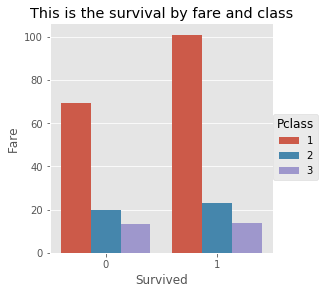

In [47]:
sns.factorplot("Survived","Fare", "Pclass" , data=dataset, kind="bar", ci=None)
plt.title("This is the survival by fare and class")
plt.show()

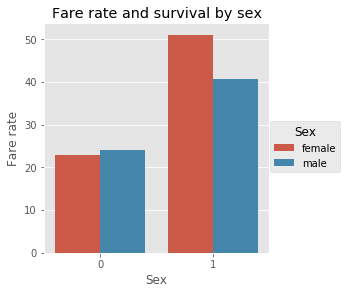

In [48]:
sns.factorplot(x="Survived",y="Fare", hue="Sex", data=dataset, kind="bar", ci=None)
plt.xlabel("Sex")
plt.ylabel('Fare rate')
plt.title('Fare rate and survival by sex')
plt.show()

# Boxplots

## Simple boxplot

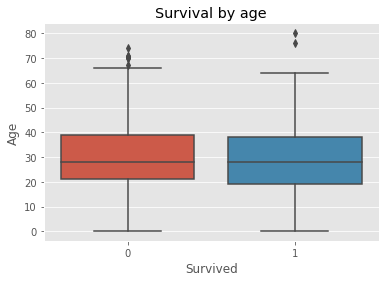

In [49]:
sns.boxplot(x= "Survived", y ="Age", data = dataset)
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Survival by age")
plt.show()

## Multivariate boxplots

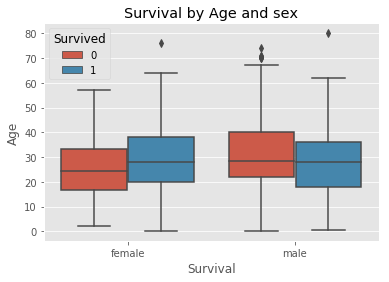

In [50]:
sns.boxplot("Sex", "Age","Survived", data = dataset)
plt.xlabel("Survival")
plt.ylabel("Age")
plt.title("Survival by Age and sex")
plt.show()

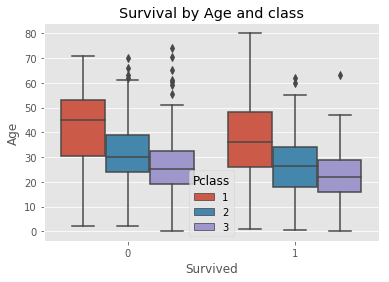

In [51]:
sns.boxplot("Survived", "Age", "Pclass", data = dataset)
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Survival by Age and class")
plt.show()

# Seaborn code for a basic scatterplot

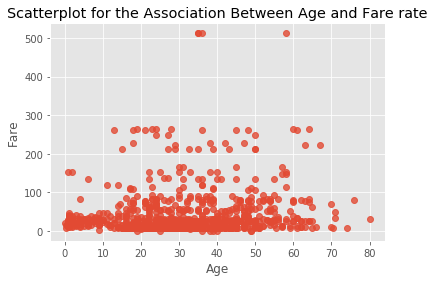

In [52]:
sns.regplot(x="Age", y="Fare", scatter=True, fit_reg=False, data=dataset) # fit_reg = True give the confidence interval
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatterplot for the Association Between Age and Fare rate")
plt.show()

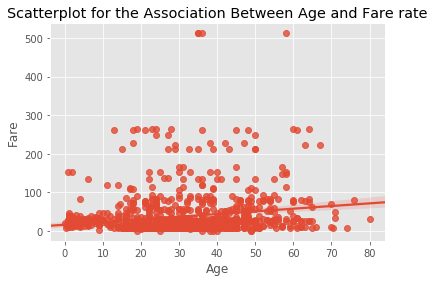

In [53]:
sns.regplot(x="Age", y="Fare", scatter=True, fit_reg=True, data=dataset) # fit_reg = True give the confidence interval
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatterplot for the Association Between Age and Fare rate")
plt.show()

# Graph an interaction